In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import plotly

In [2]:
 np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

In [3]:
df=pd.read_csv(r"../data/attrition_data.csv")
df.drop(['TERMINATION_YEAR'], axis = 1, inplace=True)
df.drop(['EMP_ID'], axis = 1, inplace=True)
df.drop(['ANNUAL_RATE'], axis = 1, inplace=True)
df.drop(['REFERRAL_SOURCE'], axis = 1, inplace=True)
df=df.replace({'STATUS': {'T': 1, 'A': 0}})

In [4]:
x=df.drop(['STATUS'], axis=1)
y=df['STATUS']

In [5]:
x = pd.get_dummies(x, columns=['ETHNICITY', 'SEX', 'MARITAL_STATUS', 'NUMBER_OF_TEAM_CHANGED', 'HIRE_MONTH', 'IS_FIRST_JOB', 'TRAVELLED_REQUIRED', 'DISABLED_EMP', 'DISABLED_VET', 'JOB_GROUP'])

In [6]:
to_be_label_encoded = ['EDUCATION_LEVEL']
label_encoder = LabelEncoder()
for column in to_be_label_encoded:
    x[column] = label_encoder.fit_transform(x[column])

In [7]:
x = StandardScaler().fit_transform(x)

In [8]:
pca = PCA()
x_pca = pca.fit_transform(x)

In [9]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.032, 0.031, 0.018, 0.018, 0.017, 0.017, 0.015, 0.015, 0.015,
       0.014, 0.012, 0.011, 0.011, 0.011, 0.010, 0.010, 0.010, 0.010,
       0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010, 0.010,
       0.010, 0.010, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009, 0.009,
       0.009, 0.009, 0.009, 0.009, 0.009, 0.008, 0.008, 0.008, 0.008,
       0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.008,
       0.008, 0.008, 0.008, 0.008, 0.008, 0.008, 0.007, 0.007, 0.006,
       0.006, 0.004, 0.003, 0.003, 0.002, 0.002, 0.001, 0.000, 0.000,
       0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000])

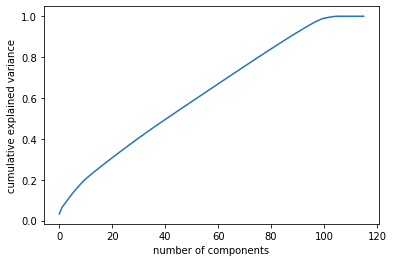

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [11]:
X_pca = pd.DataFrame(x_pca)
X_pca['STATUS']=y
columns = []
for i in range(0, len(explained_variance)):
    columns.append('PC'+str(i+1))
columns.append('STATUS')
X_pca.columns = columns
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,STATUS
0,1.198703,-2.601600,-0.607127,-0.613553,0.564628,-1.087429,0.712748,-1.705031,0.785697,-1.249709,...,2.246122e-15,-1.919729e-15,-1.979762e-16,-8.203857e-16,1.397138e-15,-2.109864e-15,9.951256e-16,1.289816e-15,1.836574e-16,1
1,4.602874,2.413942,0.693388,-1.428488,-0.337142,2.273877,0.650325,3.754330,2.943476,-1.553508,...,2.687303e-16,6.449961e-16,-1.451099e-15,-2.489289e-16,2.125353e-16,-2.450522e-16,5.459687e-16,-6.844085e-18,2.749253e-16,0
2,5.186700,2.091925,-1.355902,-0.896226,0.075521,-0.085992,-0.659715,4.912817,1.048094,-1.182687,...,-3.249126e-15,3.100802e-15,9.021189e-16,1.382702e-15,-4.017008e-16,-7.037995e-15,-2.380478e-15,-1.941622e-15,1.341753e-16,0
3,-1.720587,-0.743381,-1.711474,2.049688,0.889374,1.104762,-0.932239,-0.817646,1.928219,0.175688,...,6.400591e-16,3.595140e-16,-1.336803e-15,-1.500501e-15,5.464341e-16,1.800543e-15,1.125161e-15,3.883621e-16,1.399795e-16,1
4,1.526313,1.696959,-0.833420,-1.101448,0.095356,-1.132918,-0.471871,-1.369949,2.336079,-0.040855,...,-1.244409e-15,1.027250e-15,5.050028e-16,-9.094494e-16,-1.016290e-15,-1.663143e-15,4.985551e-16,3.504744e-16,-2.866297e-16,0


In [12]:
target_names = np.unique(y)

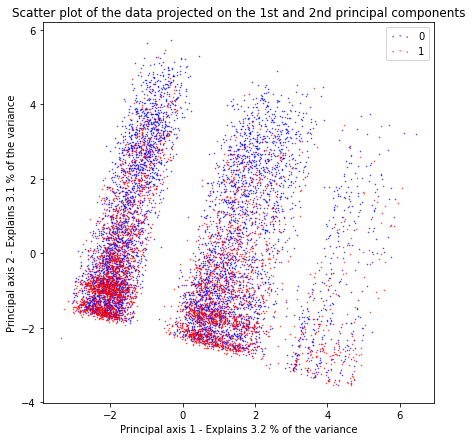

In [16]:
colors = ['blue', 'red']
plt.figure(1, figsize=(7, 7))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(x_pca[y == i, 0], x_pca[y == i, 1], color=color, s=1,
                alpha=.8, label=target_name, marker='.')
plt.legend(loc='best', shadow=False, scatterpoints=3)
plt.title(
        "Scatter plot of the data projected on the 1st "
        "and 2nd principal components")
plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))

plt.savefig('pca.png', dpi=150)
plt.show()

In [17]:
tot = sum(pca.explained_variance_ratio_)
var_exp = [(i / tot)*100 for i in sorted(pca.explained_variance_ratio_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,len(pca.explained_variance_ratio_)+1)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,len(pca.explained_variance_ratio_)+1)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
plotly.offline.iplot(fig)